In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import random
import warnings
warnings.filterwarnings('ignore')

# Wczytanie danych i pierwsze spojrzenie

In [2]:
df = pd.read_csv("allegro-api-transactions.csv")

In [3]:
df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

In [5]:
df["it_location"].value_counts()

Warszawa                               23244
Kraków                                 15135
Łódź                                   10935
Poznań                                 10610
Wrocław                                 8646
                                       ...  
Myślenice ,Siepraw ul Myślenicka 9,        1
Gryfice                                    1
Łódź,Kraków,Warszawa,Katowice              1
Białuty                                    1
Pruszków, Warszawa                         1
Name: it_location, Length: 10056, dtype: int64

In [6]:
df["price"].value_counts()

1.00      7904
9.99      4441
19.99     4201
99.00     3583
15.00     3393
          ... 
263.95       1
28.52        1
46.21        1
26.19        1
216.48       1
Name: price, Length: 9722, dtype: int64

Chyba dane są git

# Kodowanie zmiennych kategorycznych

## Target encoding

In [7]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()
it_location_TE = encoder.fit_transform(df['it_location'], df['price'])
it_location_TE

,it_location
0,85.423398
1,85.423398
2,61.990914
3,35.433365
4,117.191956
...,...
420015,24.306929
420016,66.785334
420017,18.682800
420018,106.203076


Jest to dosyć prosty oraz szybki encoding. Zaletami nad one-hot encodingiem, jest to, że nie zwiększa to rozmiaru pamięci potrzebnej na dane, oraz że można tego użyć, gdy jest bardzo dużo różnych zmiennych. W wypadku, gdybyśmy chcieli zastosować one-hot encoding to byśmy musieli mieć:

In [8]:
len(it_location_TE["it_location"].unique())

6284

nowych kolumn!

Ratunkiem może być użycie "Other" dla miast występujących raz/kilka razy, ale nawet wtedy będzie zbyt wiele zakodowań by używać sensownie one-hot encodingu.  

## One-hot encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
encoding = le.fit_transform(df.main_category)

encoder = ce.OneHotEncoder(cols = "main_category")
df_OHE = encoder.fit_transform(df)
df_OHE.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,0,0,0,0,0,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,...,0,0,0,0,0,0,0,0,0,0


W przypadku kolumny main_category dodaje ten encoding tylko 26 kolumn, więc jest to znośna liczba. Również, nie tracimy żadnych informacji za jego pomocą.

## Count encoding

In [10]:
encoder = ce.CountEncoder(cols = "main_category")
df_CE = encoder.fit_transform(df)
df_CE.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,14491
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,54257
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,91042
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,11572
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,54257


Count encoding polega, na zamienieniu zmiennej kategorycznej liczbą wystąpień danej zmiennej. Zaletą jest fakt, że nie zwieksza ten encoding pamięci potrzebnej do przechowywania danych. Wadą jest teoretyczna sytuacja, gdzie się powtarza liczba wystąpień dla dwóch różnych zmiennych. Również w tym przypadku, nie wydaje się mieć sensu taki encoding.

## Helmert encoding

In [11]:
encoder = ce.HelmertEncoder(cols = "main_category")

df_HE = encoder.fit_transform(df)
df_HE.head()

,intercept,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,...,main_category_16,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25
0,1,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


Encoding nie jest tak łatwy by wytłumaczyć samymi słowami, należy poczytać o "Helmert contrast coding". Analogicznie jak w one-hot encodingu, dodaje 26 kolumn.

## Ilość kolumn na encoding

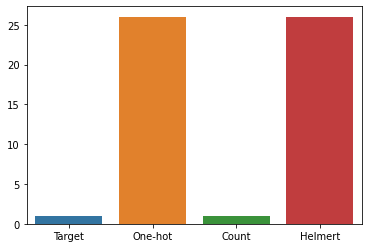

In [12]:
ax = sns.barplot(x=["Target", "One-hot", "Count", "Helmert"], y=[1, 26, 1, 26])

Jakkolwiek prosto to brzmi - "tam dużo, tu mało" pasuje idealnie do porównania tego, ile kolumn dodatkowych jest potrzebnych na zastosowanie danego encodingu.

## Uzupełnianie braków

Weźmy tylko dane z których będziemy korzystać:

In [13]:
ampDF = df[["price", "it_seller_rating", "it_quantity"]]
ampDF

,price,it_seller_rating,it_quantity
0,59.99,50177,997
1,4.90,12428,9288
2,109.90,7389,895
3,18.50,15006,971
4,19.90,32975,950
...,...,...,...
420015,180.00,176,0
420016,14.99,34851,2
420017,5.99,983,470
420018,200.00,163,0


## Usunięcie tylko danych z jednej kolumny

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

rmseOneCol = []
for i in range(10):
    tempDF = deepcopy(ampDF)
    #losowanie indexów
    indexes = random.sample(list(df.index.values), df.shape[0] // 10)
    tempDF.loc[indexes, "it_seller_rating"] = np.nan
    
    #imputer
    imp = IterativeImputer(max_iter=10, random_state=0)
    tempDF = imp.fit_transform(tempDF)
    
    #RMSE
    rmseOneCol.append(mean_squared_error(ampDF, tempDF, squared=False))
print("std:", np.std(rmseOneCol))

std: 26.193865798051753


## Usunięcie danych z dwóch kolumn

In [15]:
rmseTwoCol = []
for i in range(10):
    tempDF = deepcopy(ampDF)
    #losowanie indexów
    indexes = random.sample(list(df.index.values), df.shape[0] // 10)
    tempDF.loc[indexes, "it_seller_rating"] = np.nan
    
    indexes = random.sample(list(df.index.values), df.shape[0] // 10)
    tempDF.loc[indexes, "it_quantity"] = np.nan
    
    #imputer
    imp = IterativeImputer(max_iter=10, random_state=0)
    tempDF = imp.fit_transform(tempDF)
     
    #RMSE dla wielu kolumn
    rmseTwoCol.append(mean_squared_error(ampDF, tempDF, squared=False))
print("std:", np.std(rmseTwoCol))

std: 45.55426145881994


## Wizualizacja wyników

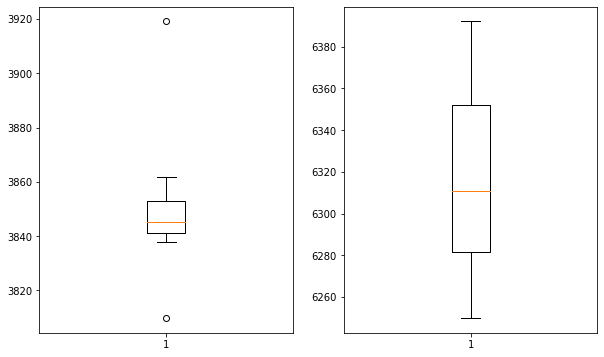

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(10)
ax1.boxplot(rmseOneCol)
ax2.boxplot(rmseTwoCol)
plt.show()

## Podsumowanie

Przy wielu odpaleniach kodu bez ustawionego seedu, zawsze RMSE dla jednej kolumny było mniejsze niż, gdy wartości z dwóch kolumn były usuwane. Można więc powiedzieć, że rzeczywiście to ile danych zostało losowo usuniętych - 10%, czy 2x10% ma znaczenie. Same odchylenia standardowe nie były zbyt duże, gdyż wynosiły około 30-80 dla 10% oraz 40-100 dla 2x10%. Problemem może być mój sposób na obliczanie RMSE, gdyż liczę RMSE z całego data frame'u, a nie pojedynczych kolumn, ponieważ dla dwóch doświadczeń jest różna liczba kolumn zmieniona, a w ten sposób jest łatwo wyznaczyć RMSE. Wątpię jednak, żeby to miało znaczenie na to, że rzeczywiście dla większej ilości brakujących danych są gorsze wyniki.